In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [14]:
df_train = pd.read_csv('/home/khaled-hasan/Credit-Card-Fraud-Detection1/data/split/train.csv')
df_train.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,...,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73,0
1,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,...,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95,0
2,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,...,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65,0
3,55709.0,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,0.499394,...,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,4.78,0
4,66654.0,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,0.400860,...,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,44.31,0


let's build some informations about data

In [15]:
print(df_train.info())


# count the occurences of fraud and non fraud
occ = df_train['Class'].value_counts()
print(occ)

# Print the ratio of fraud cases
print(occ / len(df_train.index))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170884 entries, 0 to 170883
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170884 non-null  float64
 1   V1      170884 non-null  float64
 2   V2      170884 non-null  float64
 3   V3      170884 non-null  float64
 4   V4      170884 non-null  float64
 5   V5      170884 non-null  float64
 6   V6      170884 non-null  float64
 7   V7      170884 non-null  float64
 8   V8      170884 non-null  float64
 9   V9      170884 non-null  float64
 10  V10     170884 non-null  float64
 11  V11     170884 non-null  float64
 12  V12     170884 non-null  float64
 13  V13     170884 non-null  float64
 14  V14     170884 non-null  float64
 15  V15     170884 non-null  float64
 16  V16     170884 non-null  float64
 17  V17     170884 non-null  float64
 18  V18     170884 non-null  float64
 19  V19     170884 non-null  float64
 20  V20     170884 non-null  float64
 21  V21     17

In [16]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,170884.0,94966.107886,47464.723773,0.000000,54348.000000,84923.500000,139404.000000,172792.000000
V1,170884.0,-0.001070,1.958944,-46.855047,-0.922071,0.016603,1.316250,2.451888
V2,170884.0,-0.000904,1.650481,-63.344698,-0.599127,0.065839,0.802518,22.057729
V3,170884.0,-0.002722,1.521820,-48.325589,-0.896376,0.177007,1.028302,4.226108
V4,170884.0,-0.002603,1.416490,-5.683171,-0.848978,-0.020895,0.738812,16.875344
V5,170884.0,0.000151,1.394123,-113.743307,-0.691840,-0.054185,0.612154,34.099309
V6,170884.0,0.000779,1.338331,-23.496714,-0.768986,-0.274228,0.400359,73.301626
V7,170884.0,-0.000811,1.260122,-43.557242,-0.554440,0.040417,0.569221,120.589494
V8,170884.0,-0.002327,1.208709,-73.216718,-0.209596,0.021461,0.326026,18.282168
V9,170884.0,-0.000622,1.098393,-13.434066,-0.642036,-0.051777,0.595095,10.392889


In [17]:
df_train.isnull().sum().sum()

np.int64(0)

In [18]:
df_train.duplicated().sum()

np.int64(448)

In [19]:
df_train.drop_duplicates(inplace = True)

   Class     ratio   count
0      0  0.998257  170139
1      1  0.001743     297


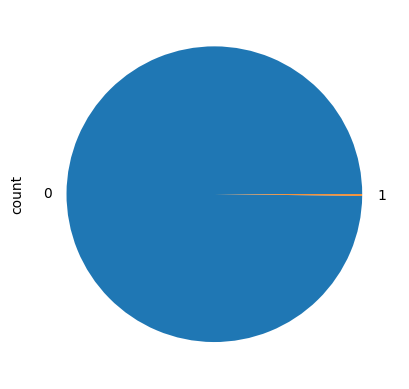

In [25]:
# Check class imbalance
num_rows = df_train.shape[0]
class_count = df_train['Class'].value_counts().to_dict()

class_stat = pd.DataFrame({
    "Class": class_count.keys(),
    "ratio": [i / num_rows for i in class_count.values()],
    "count": class_count.values()
})

print(class_stat)
df_train['Class'].value_counts().plot(kind = "pie")
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

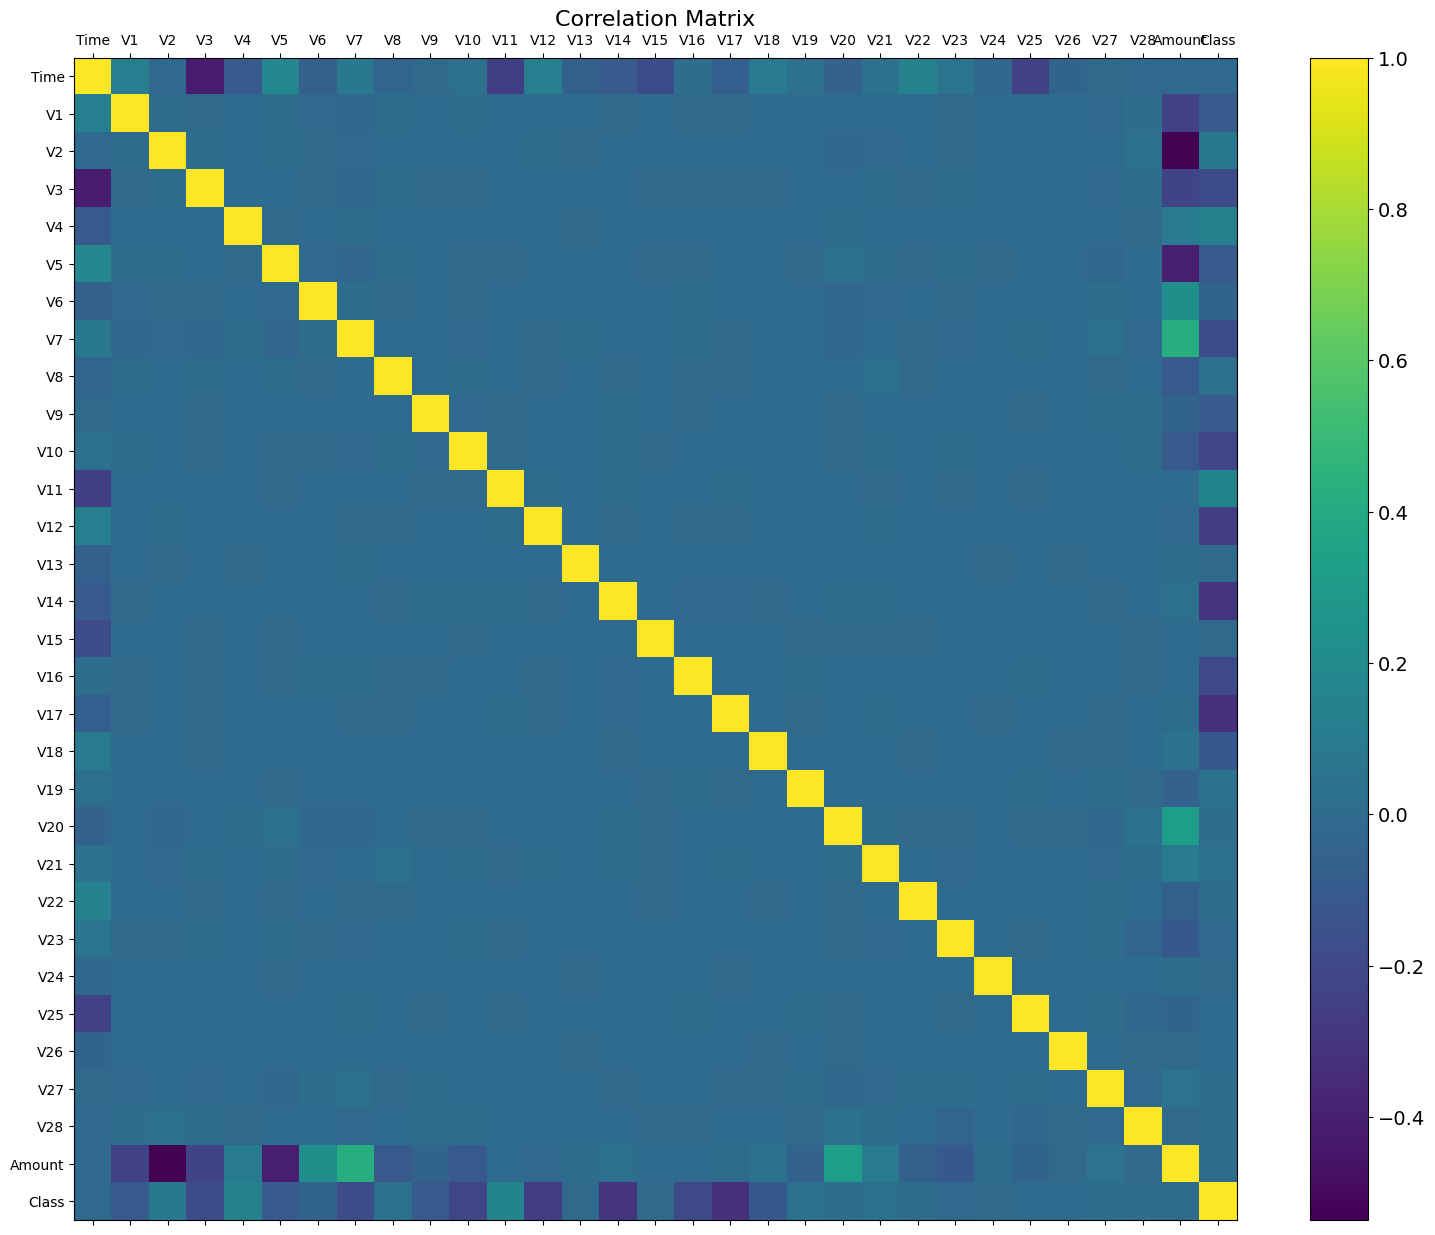

In [26]:
# Plot correlation matrix 
corr = df_train.corr()
f =plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title('Correlation Matrix', fontsize=16)

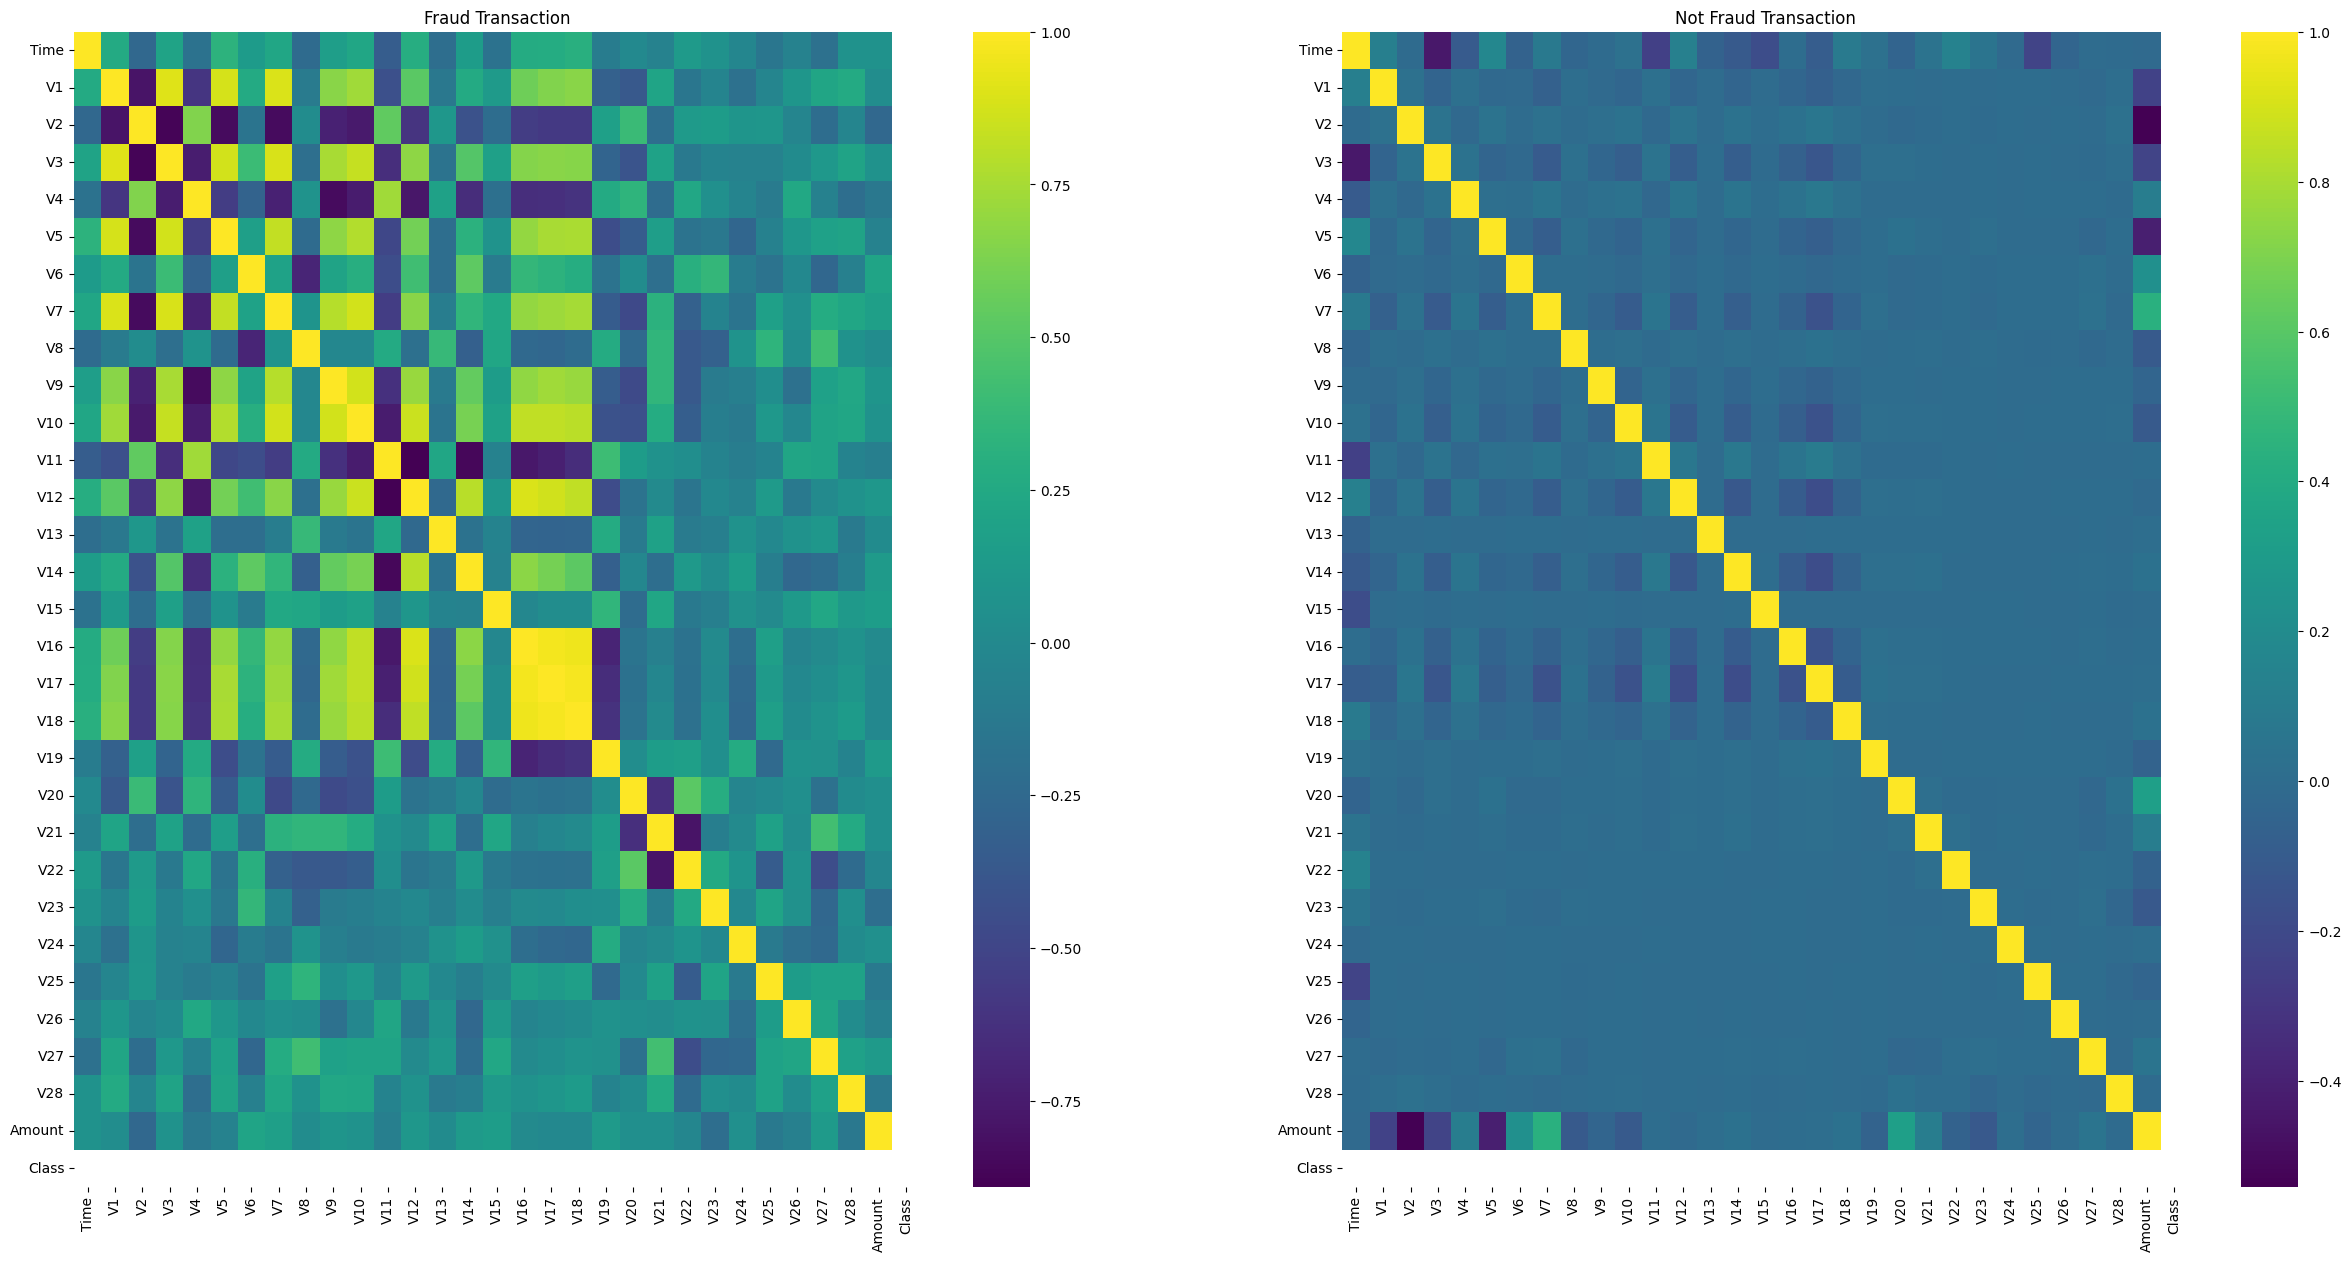

In [27]:
# Plot the subplot of the fraud and normal transcctions correlation matrix seeperatly
fraud_transaction = df_train[df_train['Class'] == 1]
not_fraud_transaction = df_train[df_train['Class']  == 0]

f = plt.figure(figsize=(30,15))
plt.subplot(1, 2, 1)
sns.heatmap(fraud_transaction.corr(), cmap='viridis' , annot=False)
plt.title('Fraud Transaction')
plt.subplot(1,2,2)
sns.heatmap(not_fraud_transaction.corr(),cmap='viridis', annot=False)
plt.title('Not Fraud Transaction')
plt.show()

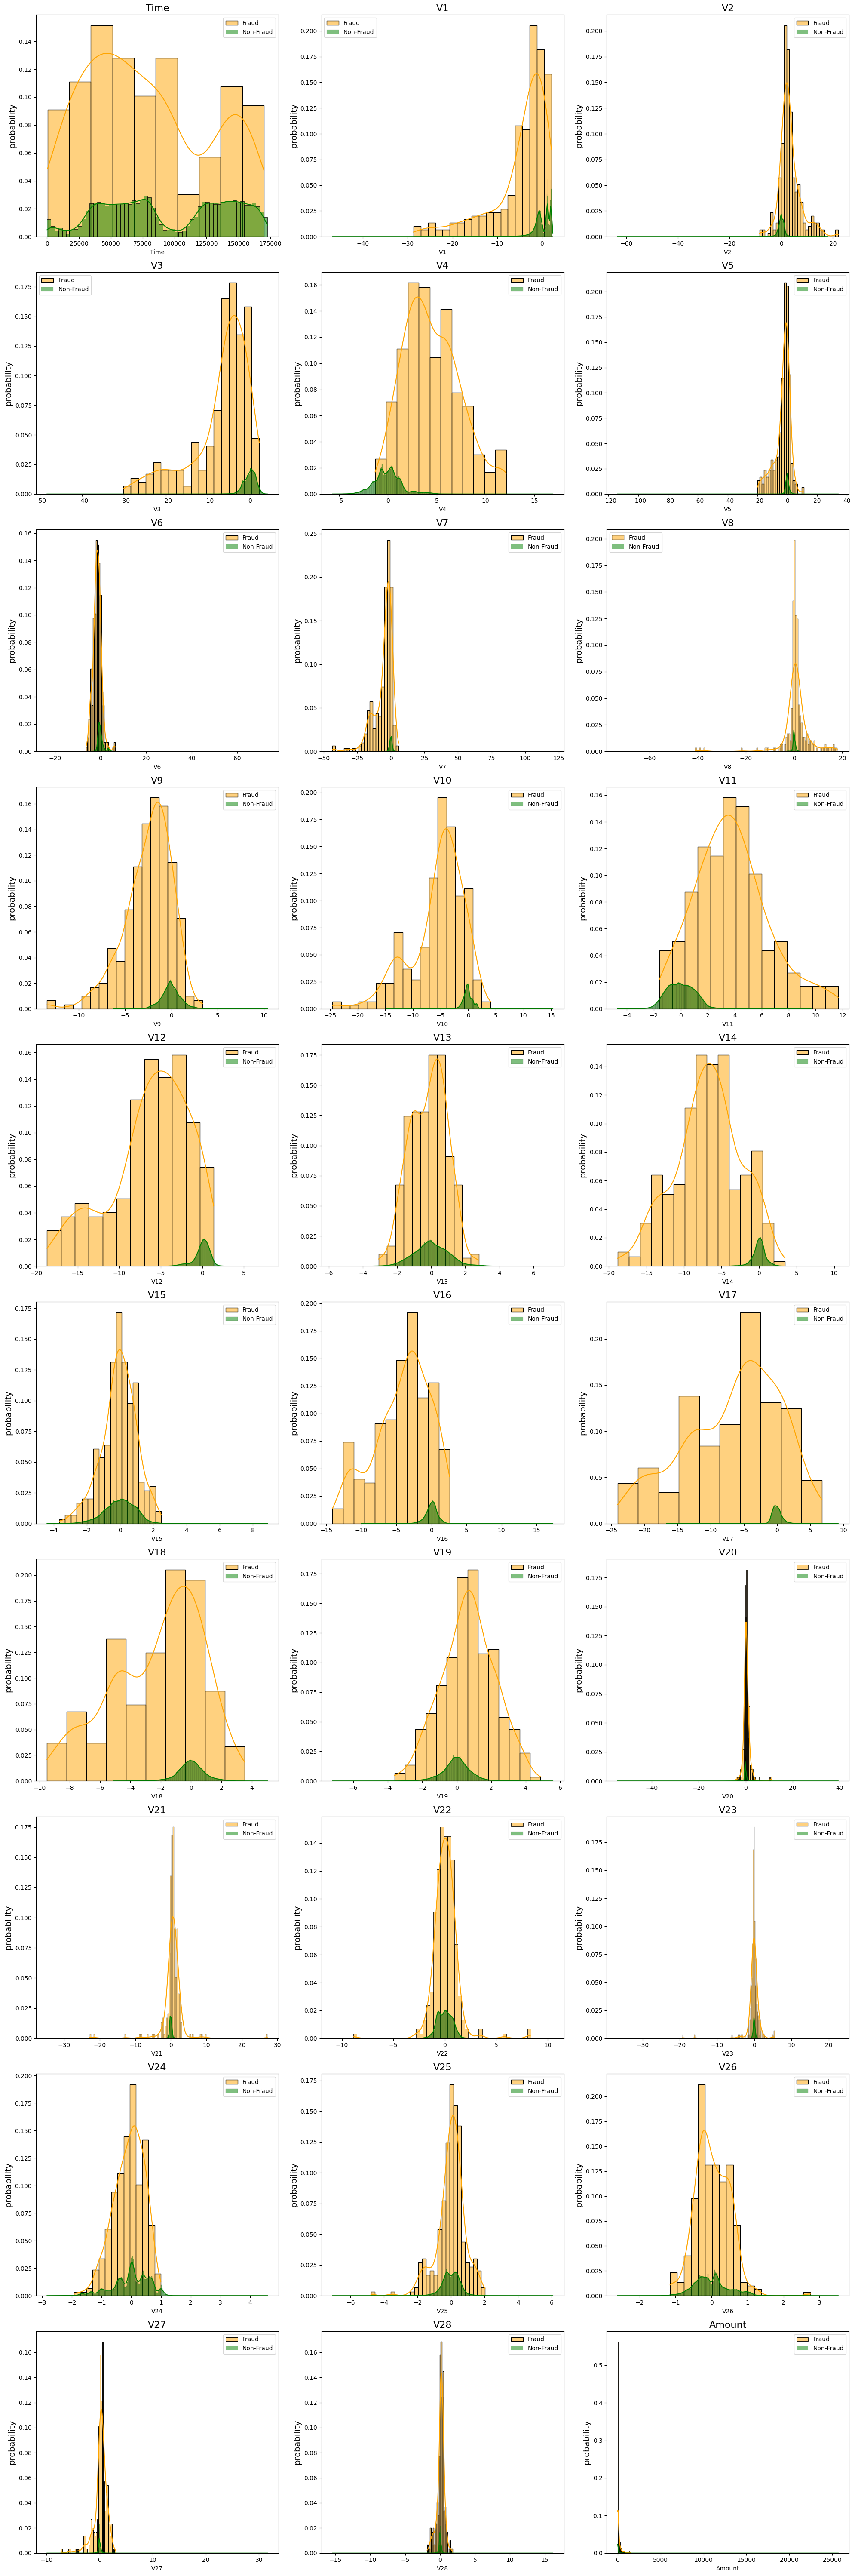

In [28]:
# Plot distribution of each feature fffor fraud and not fraud transactions
# KDA  kernel density estimation

fraud_records = df_train['Class'] == 1
nonfraud_records = df_train['Class'] == 0

figure = plt.figure(figsize=(20, 60))
for i, col in enumerate(df_train.columns.to_list()):
    if  col == 'Class': continue
    plt.subplot(10, 3, i+1)
    sns.histplot(df_train[col][fraud_records], color = 'orange', label='Fraud', stat= 'probability', kde  =True,fill= True, alpha=0.5)
    sns.histplot(df_train[col][nonfraud_records], color = 'green', label='Non-Fraud', stat= 'probability', kde  =True,fill= True, alpha=0.5)
    plt.title(col, fontsize= 16)
    plt.ylabel('probability', fontsize= 14)
    plt.legend()
plt.tight_layout()
plt.show()    

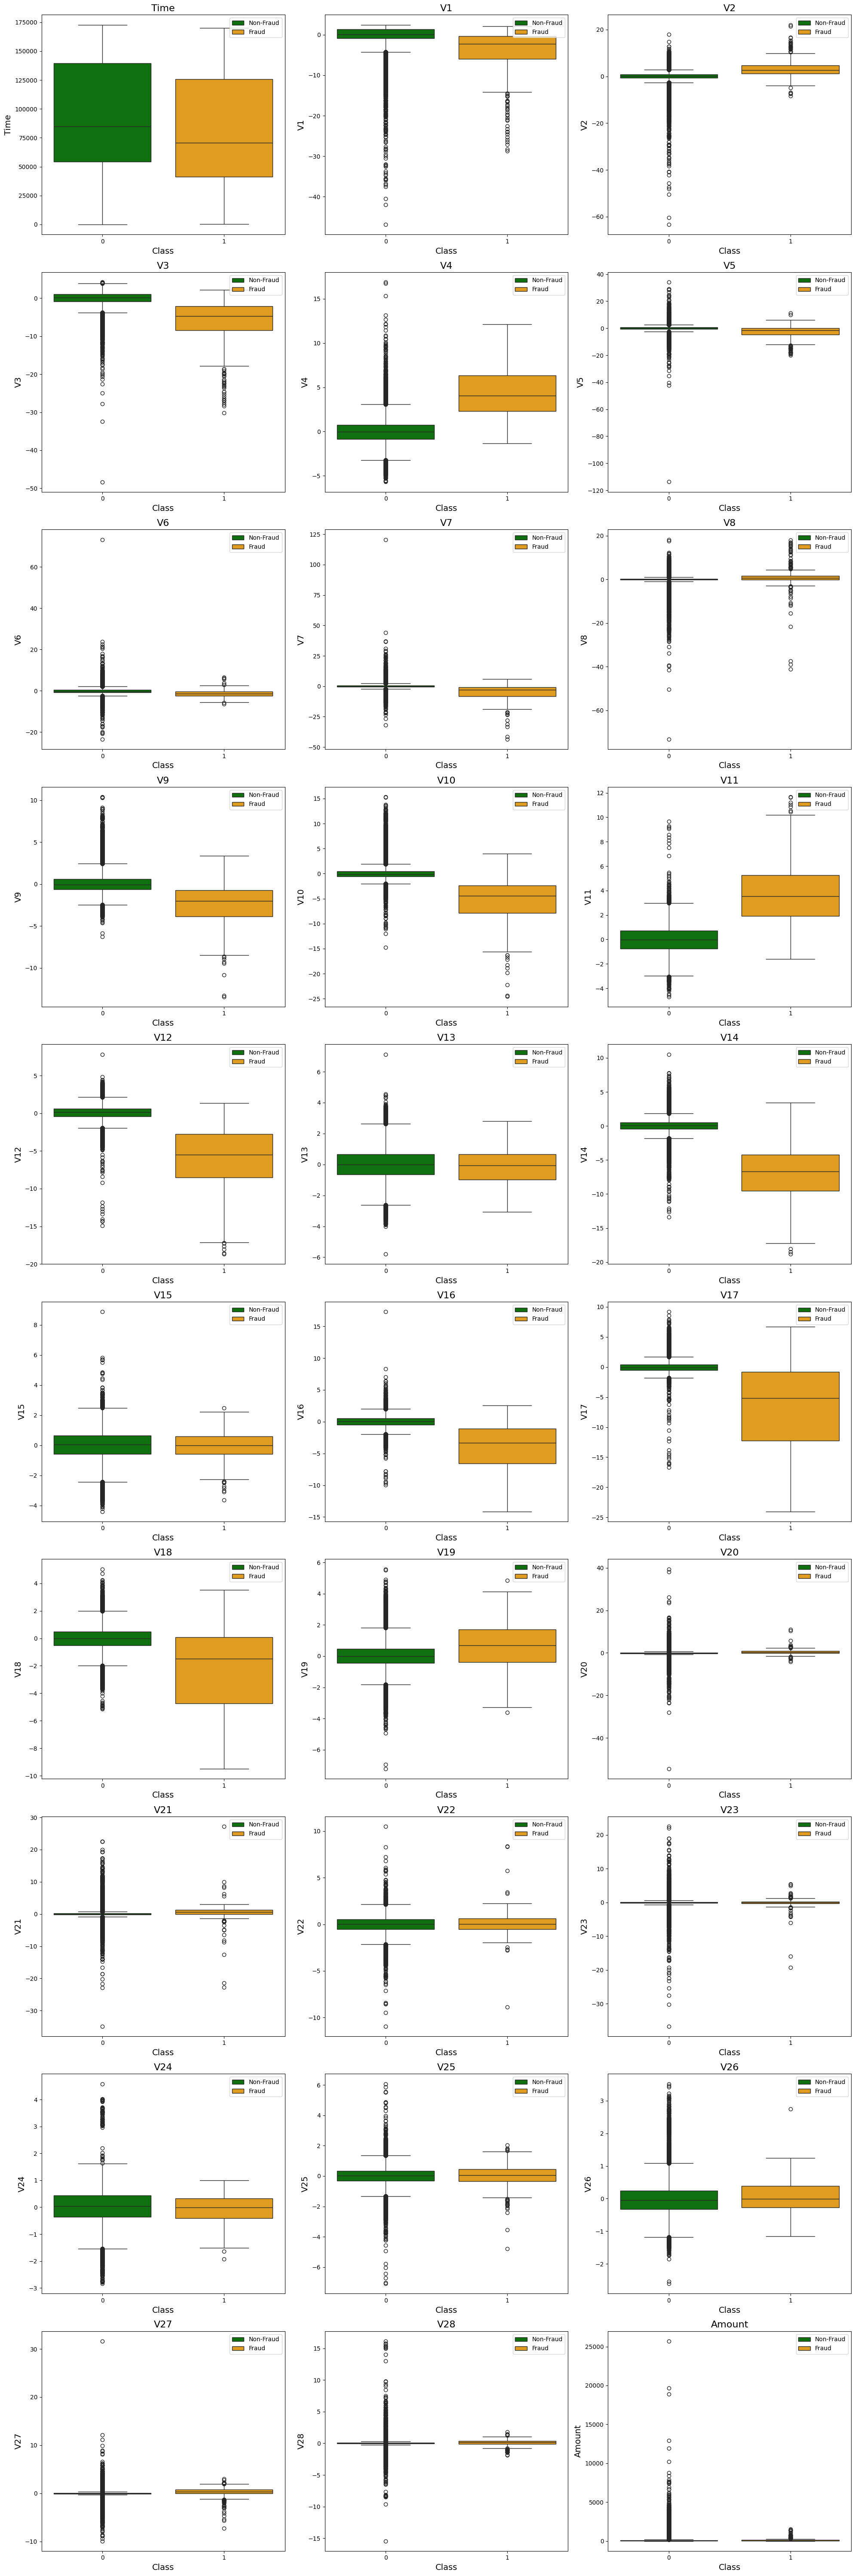

In [29]:
figure = plt.figure(figsize=(20, 60))
for i, col in enumerate(df_train.columns.to_list()):
    if col == 'Class':
        continue
    plt.subplot(10, 3, i + 1)
    sns.boxplot(x='Class', y=col, data=df_train, hue='Class', palette=['green', 'orange'])
    plt.title(col, fontsize=16)
    plt.xlabel('Class', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.legend(labels=['Non-Fraud', 'Fraud'], loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
# plot 2D PCA

X = df_train.drop('Class', axis=1)  
y = df_train['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue=y, data=principal_df, palette='viridis')
plt.title('2D PCA of Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
# plot 3D PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X=X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(principal_df['PC1'], principal_df['PC2'], principal_df['PC3'], c=y, cmap='viridis')

ax.set_title('3D PCA of Dataset')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')


legend = ax.legend(*scatter.legend_elements(), title="Class")
ax.add_artist(legend)

plt.show()

In [ ]:
# feature importance by random forest
from cradit_fraud_utils_helper import load_model

model_path = 'models/2024_07_18_07_29/trained_models.pkl' 
model = load_model(model_path) 

rf = model['Random_forest']['model']

importances = rf.feature_importances_
feature_names = df_train.columns

indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()